# CSCI 5901 - Assignment 1

### Deep Nimesh Shah - B00796368
### Ravi Tulsi Zala - B00805073

In [104]:
# https://github.com/dmlc/xgboost/issues/3004
# !{sys.executable} -m pip install ReliefF==0.1.2
# https://stackoverflow.com/questions/44856105/jupyter-notebook-xgboost-import
# https://xgboost.readthedocs.io/en/latest/build.html

import sys

!{sys.executable} -m pip install xgboost
!{sys.executable} -m pip install ReliefF==0.1.2

### Imported different libraries for performing Assignment

In [105]:
# imported different libraries for performing Assignment
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plot 
import matplotlib.pyplot as figure
import difflib 
import warnings
import xgboost as xgb
from ReliefF import ReliefF
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, learning_curve, validation_curve
from sklearn.model_selection import cross_val_score
warnings.simplefilter('ignore')
from sklearn import cross_validation
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV,train_test_split

## **Q-1 (a)**


This dataset provides information about various restaurant of Banglore which are registered in the Zomato. As Banglore is considered the IT hub of India, there is a huge amount of competition among different Restaurants. If someone is going to establish a new restaurant in the city, this dataset is helpful to get an insight into various restaurants rating, cuisine, location etc.

1. URL :-  It contains the URL of every restaurant.
2. address:- This attribute provides the of the restaurant in Banglore.
3. name :- This attribute contains the name of the various restaurant.
4. online_order:- This attribute provides detail of whether the restaurant provides the facility to place an online order or not.
5. book_table :- it checks if the restaurant provides the facility to book a table or not.
6. Rate:-  It displays the overall rating of the restaurant from 5.
7. Votes:- It contains the total number of people who gave the rating of the restaurant.
8. Phone :- It provides the contact details of the restaurant.
9. Location:- It contains the area in which the location is located.
10. rest_type:- It displays the type of the restaurant such as bakery,bar, pub and café.
11. dish_liked:- It provides the name of the dish liked by the most number of people.
12. Cuisines:- It gives the detail about types of cuisines that restaurant provide. Ex. Arabian, North Indian.
13. approx_cost(for two people):- It shows the approximate cost for two people dining in the restaurant.
14. Review_list:- It gives a review of the restaurant.
15. menu_item:- contains a list of menus available in the restaurant.
16. listed_in(type) :- It gives the detail about in which category restaurant is listed in.
17. listed_in(city):- It shows the neighbourhood in which the restaurant is listed.


## **Q-2 (a)**
### Load the dataset from the zomato.csv file

In [217]:
def loadDataset(csvFileName):
    
    unprocessedDataframe=pd.read_csv(csvFileName)
    return unprocessedDataframe

csvFileName='zomato.csv'
unprocessedDataframe=loadDataset(csvFileName)   

unprocessedDataframe.head(10)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [62]:
#  Dispaly the number of colums and number of rows from the dataset 
#  Display the number of total not null values for each column
def printDetailsOfDataset(dataframe):
    
    print("\nNumber of Rows : " ,dataframe.shape[0])
    print("\nNumber of Columns : ", dataframe.shape[1])
    print("\n")
    print("Dataset Information : \n")
    dataframe.info()
    
    
printDetailsOfDataset(dataframe = unprocessedDataframe)    
    


Number of Rows :  51717

Number of Columns :  17


Dataset Information : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)      

## **Q-2 (b)**

Common trends which are found after plotting the distribution of the attributes.

1. Quick bytes has the highest number of count in the Banglore.

2. More than 5000 restaurants are located in the Banglore Area.

3. The Most common approx_cost(for two people) is 300 Rs.

4. Pubs and Bar are the least popular restaurant type in the Banglore.

5. North Indian cuisine is the most popular one and served in more than 2000 Banglore restaurant.

There are many attributes that are useless at this point.

1. Address:- There is no significance of address when we need to perform any data mining task on given dataset.

2. URL:- URL will be the difference for each and every restaurant, and in any kind of model or data analysis task it won’t be helpful in making any prediction

3. Name:- Name is a kind of attribute which will not be contributed in any kind of prediction task.

4. Phone:- Every restaurant has a unique phone number, and it won’t be helpful for the creation of any data mining task.

5. dish_liked:- This attribute does not help us to predict approx_cost for two people as it does not provide any productive information.

#### We have plotted following bar chart to find the distribution of different attributes such as rest_type , location, rate and approx_cost(for two people)

### Distribution Of Attributes

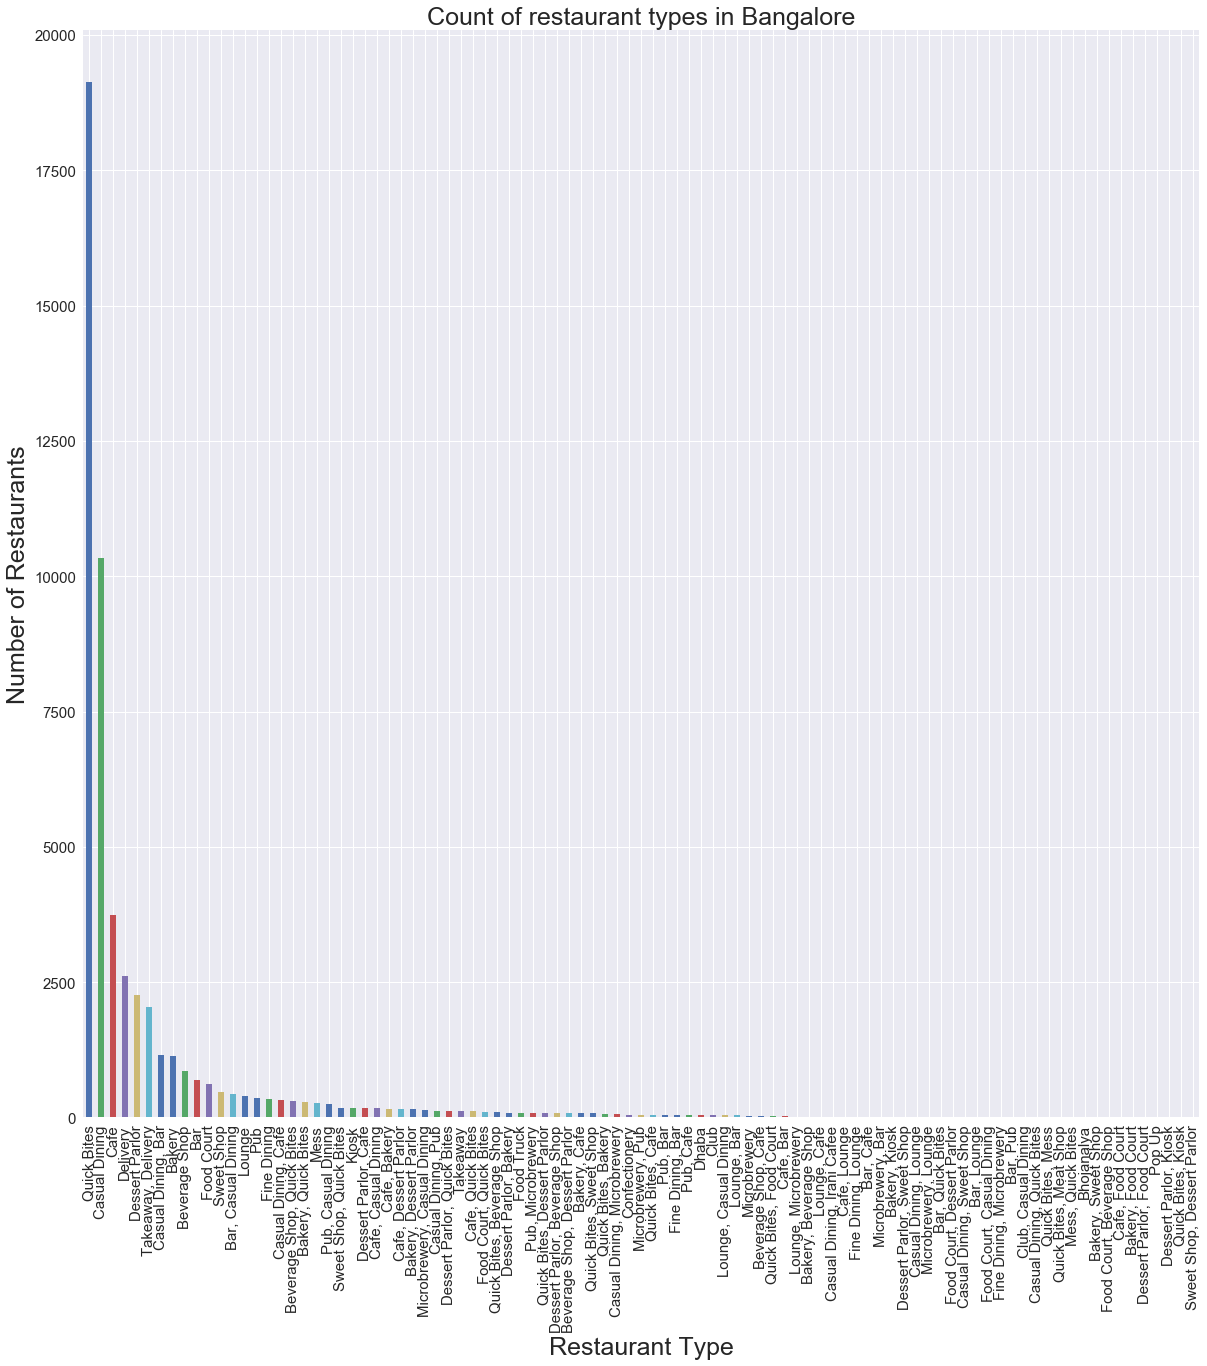

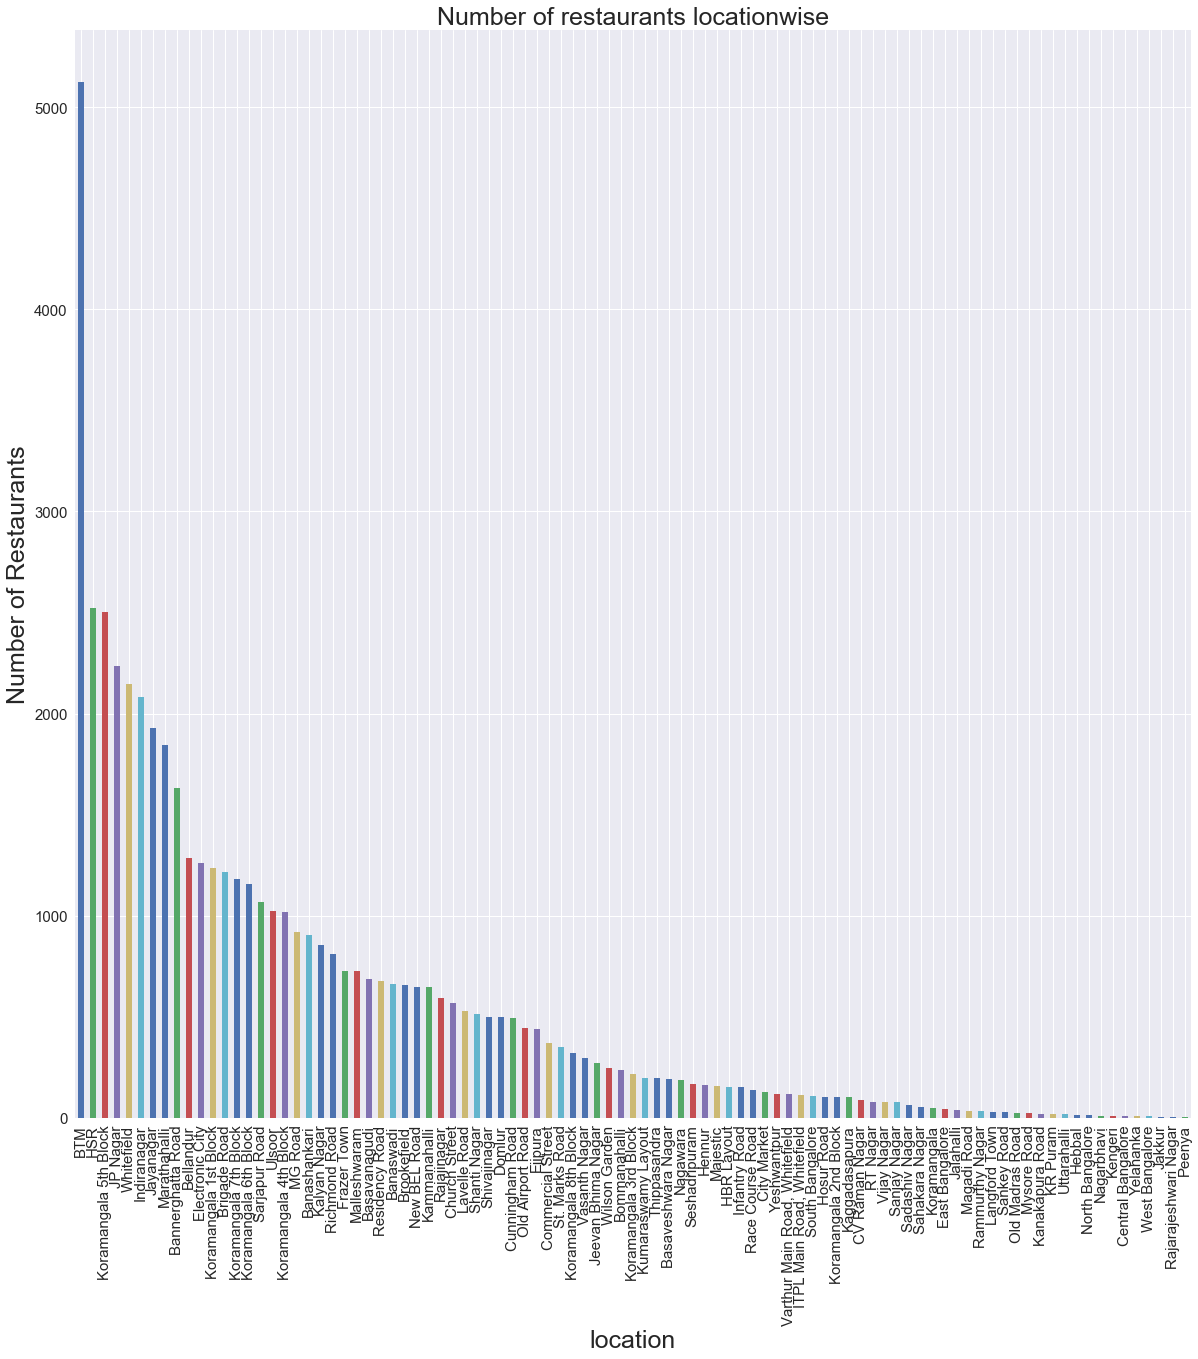

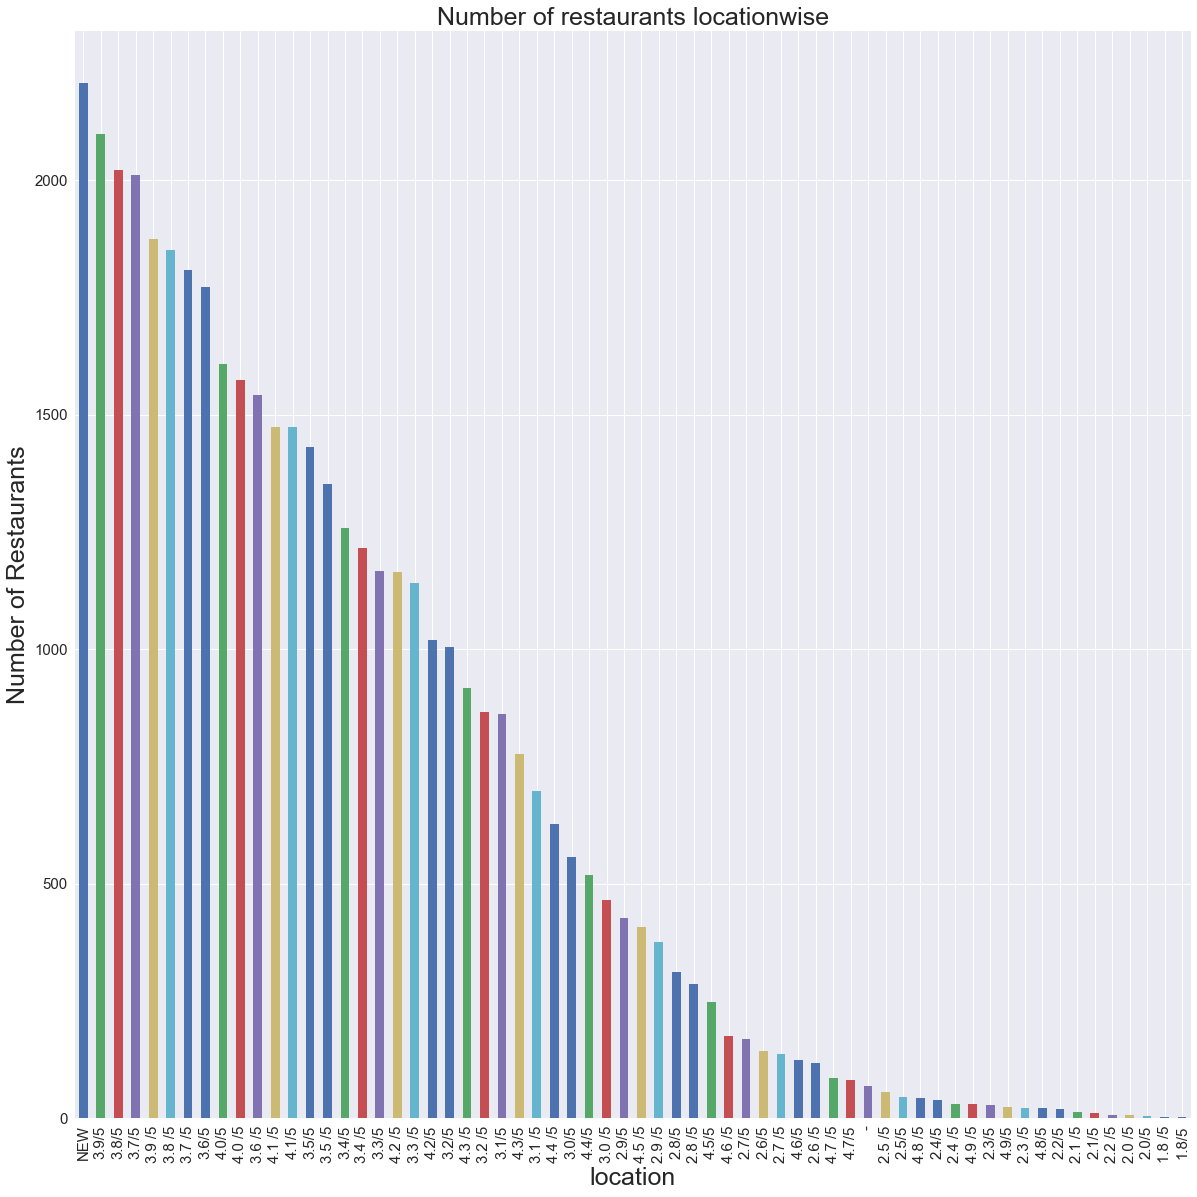

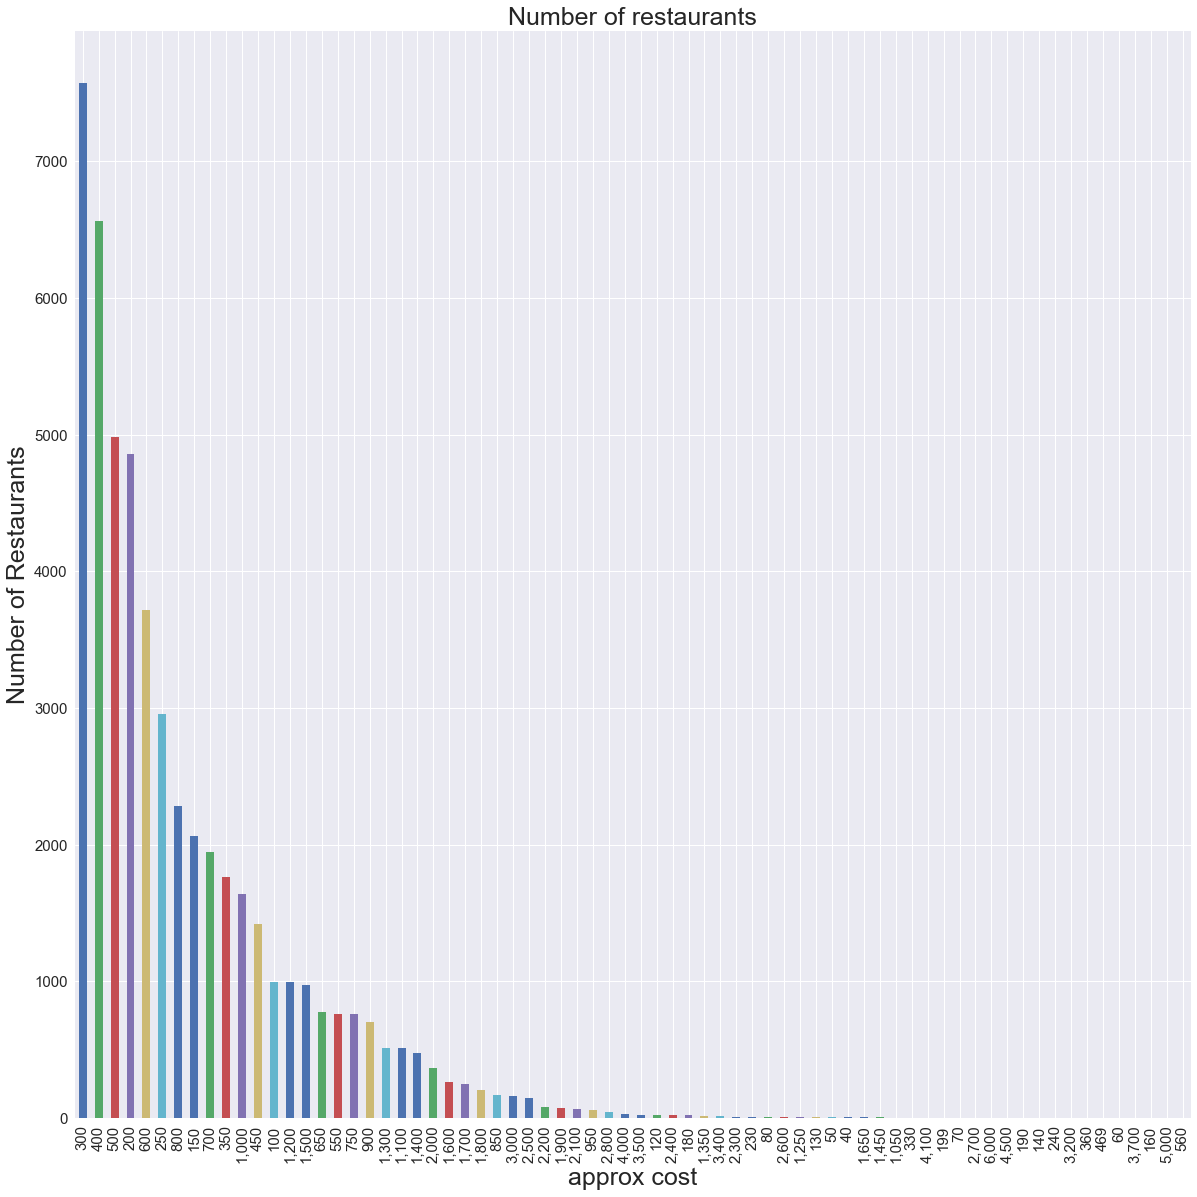

In [107]:
# We have plotted following bar chart to find the distribution 
# of different attributes such as rest_type , location, rate and approx_cost(for two people)
# https://medium.com/python-pandemonium/data-visualization-in-python-bar-graph-in-matplotlib-f1738602e9c4
def plotBarChart(dataframe,column,title,xVar,yVar):
    
    dataframe[column].value_counts().plot(kind='bar',figsize=(20,20),fontsize=15)
    plot.title(title,fontsize=25)
    plot.xlabel(xVar,fontsize=25)
    plot.ylabel(yVar,fontsize=25)
    plot.show()
    
plotBarChart(dataframe=unprocessedDataframe,column='rest_type',title='Count of restaurant types in Bangalore',xVar='Restaurant Type',yVar='Number of Restaurants')

plotBarChart(dataframe=unprocessedDataframe,column='location',title='Number of restaurants locationwise',xVar='location',yVar='Number of Restaurants')
plotBarChart(dataframe=unprocessedDataframe,column='rate',title='Number of restaurants locationwise',xVar='location',yVar='Number of Restaurants')
plotBarChart(dataframe=unprocessedDataframe,column='approx_cost(for two people)',title='Number of restaurants',xVar='approx cost',yVar='Number of Restaurants')


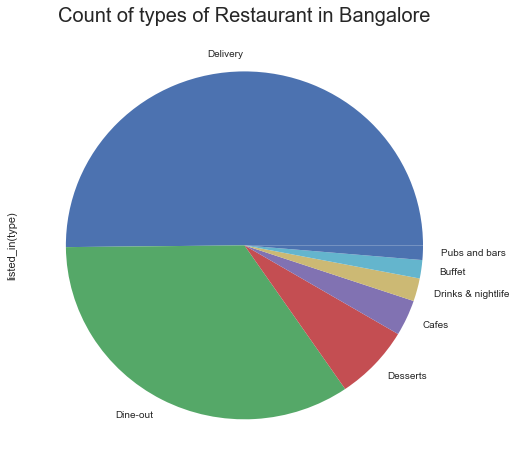

In [108]:
#  Plot the piechart of number of different types of restaurent in the Banglore
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html
def plotPiechart(dataframe,column,title):
    dataframe[column].value_counts().plot(kind='pie',figsize=(8,8),fontsize=10)
    plot.title(title,fontsize=20)
    explode = (0.1,0,0,0,0,0,0)
    plot.show()
    
plotPiechart(dataframe=unprocessedDataframe,column='listed_in(type)',title='Count of types of Restaurant in Bangalore')

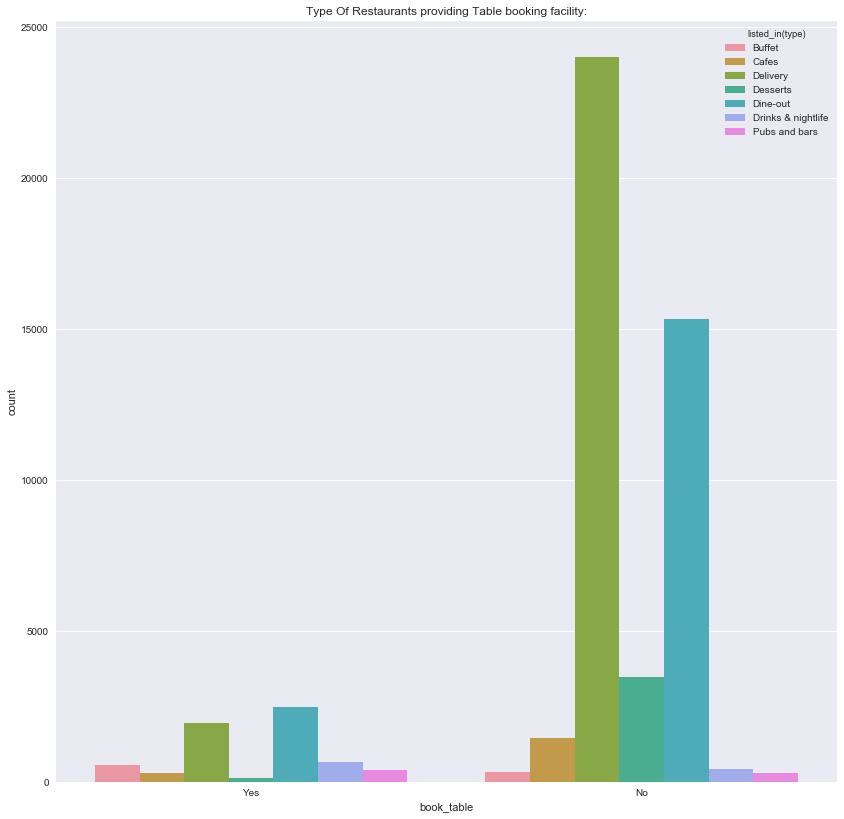

In [109]:
# plot to display number of restaurent (count) vs type of restaurent which provides table booking facilities.
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
def dualPlot(a,b):
    sns.countplot(x=a,hue=b)
    fig = plot.gcf()
    fig.set_size_inches(14,14)
    plot.title('Type Of Restaurants providing Table booking facility:')
dualPlot(a=unprocessedDataframe['book_table'],b=unprocessedDataframe['listed_in(type)'])

In [110]:
#Function which takes input as dataframe and columnname and split all the values of 
#column and store unique values into the list and return it
def getUniqueValues(dataframe,columnName):
    
    uniqueList =list()
    tempColumn =  dataframe[columnName].replace({'':np.nan}, regex=True)
    tempColumn =  tempColumn.dropna(axis=0).reset_index(drop=True)


    for i in range(0, len(tempColumn)):
        tempList = list()
        tempList = tempColumn[i].split(', ')
        for j in range(0,len(tempList)):
            uniqueList.append(tempList[j])


    uniqueDataframe = pd.DataFrame(uniqueList) 
    uniqueDataframe.rename(columns={0:columnName},inplace=True)
    
    return uniqueDataframe

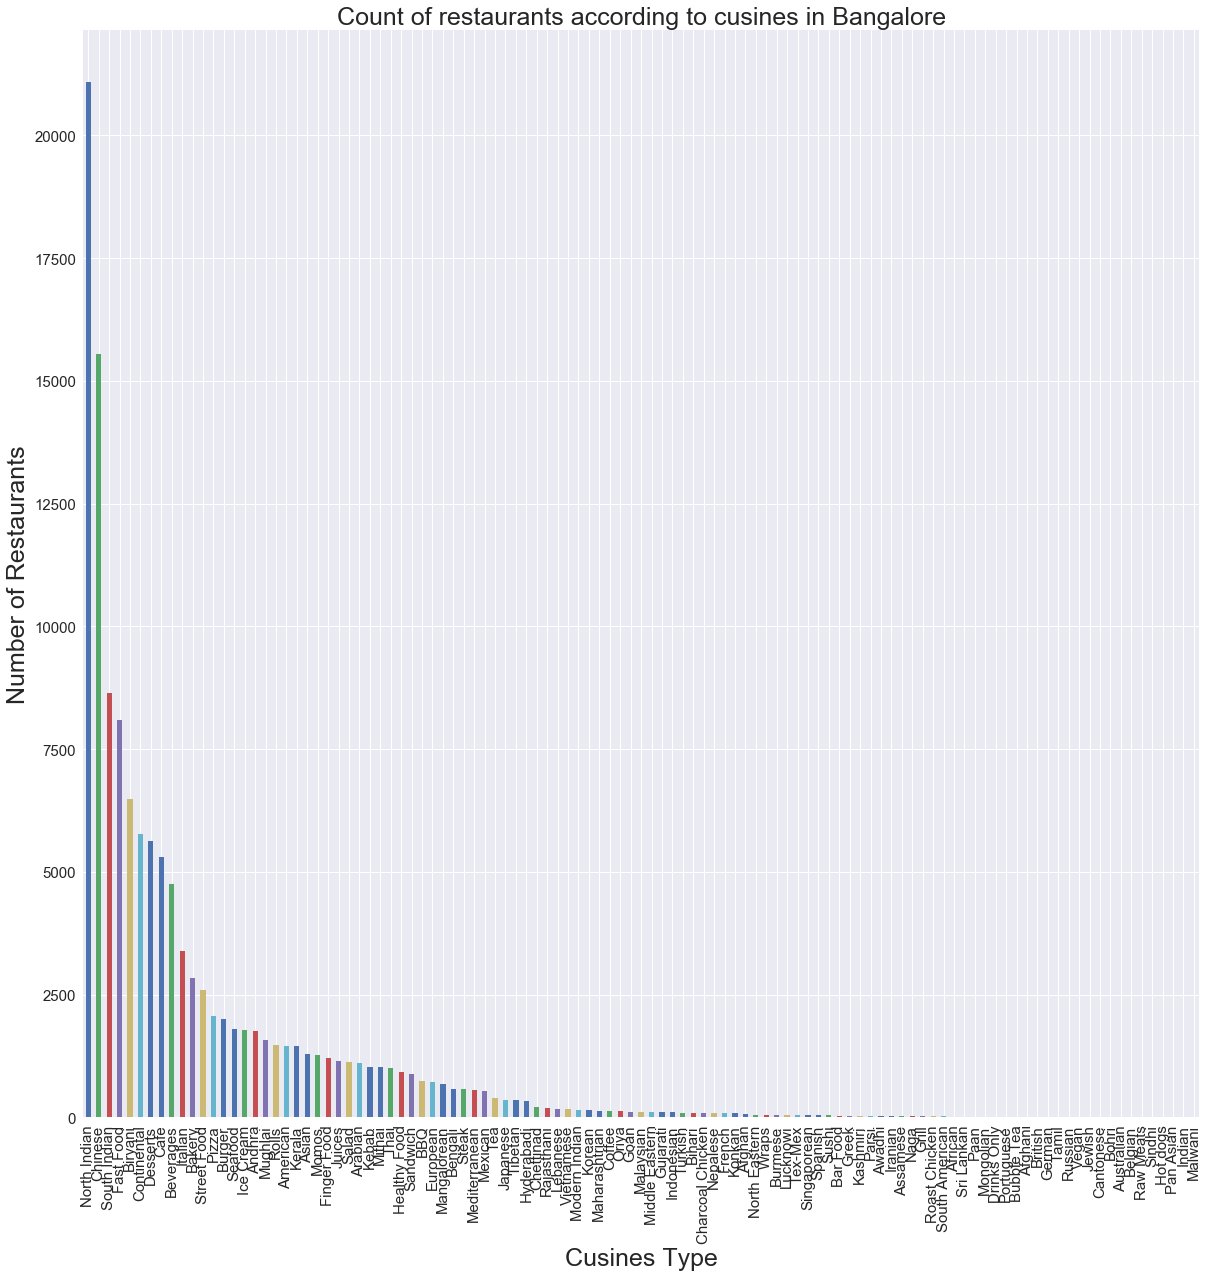

In [111]:
# cusinesplot function provides Count of restaurants according to cusines in Bangalore city
# https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
def cuisinesPlot():

    cuisineType = getUniqueValues(dataframe=unprocessedDataframe,columnName="cuisines")
    plotBarChart(dataframe=cuisineType,column="cuisines",title='Count of restaurants according to cusines in Bangalore',xVar='Cusines Type',yVar='Number of Restaurants')

cuisinesPlot()

In [227]:
unprocessedDataframe.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Cleaning Of Dataset

In [112]:
# https://stackoverflow.com/questions/13295735/how-can-i-replace-all-the-nan-values-with-zeros-in-a-column-of-a-pandas-datafra
# https://stackoverflow.com/questions/44602139/pandas-convert-all-column-from-string-to-number-except-two
# https://stackoverflow.com/questions/38565849/pandas-replace-substring-in-string
# cleanRate function removes NAN, null,-,/5 values from the rate column and convert all the ratings into the numeric values
# https://medium.com/@kasiarachuta/dealing-with-duplicates-in-pandas-dataframe-789894a28911
def cleanRate(unprocessedDataframe):

    unprocessedDataframe.rate.replace({'/5':''},inplace=True, regex=True)
    unprocessedDataframe.rate.replace({'NEW':'0'},inplace=True,regex=True)
    unprocessedDataframe.rate.replace({'-':'0'},inplace=True,regex=True)
    unprocessedDataframe.rate.replace(np.nan, '0',inplace=True, regex=True)
    unprocessedDataframe.rate.replace({'':'0'},inplace=True, regex=True)
    unprocessedDataframe = unprocessedDataframe.apply(pd.to_numeric, errors='coerce').fillna(unprocessedDataframe)
    cleanRateDf = unprocessedDataframe
    return cleanRateDf

cleanRateDf = cleanRate(unprocessedDataframe)

In [225]:
cleanRateDf.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
49170,https://www.zomato.com/bangalore/byg-brewski-b...,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,Yes,Yes,4.9,16832,+91 8039514766,Sarjapur Road,Microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...","1,600","[('Rated 5.0', ""RATED\n This is an absolute g...",[],Delivery,Sarjapur Road
50059,https://www.zomato.com/bangalore/byg-brewski-b...,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,Yes,Yes,4.9,16832,+91 8039514766,Sarjapur Road,Microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...","1,600","[('Rated 4.0', 'RATED\n Visiting a microbrewe...",[],Drinks & nightlife,Sarjapur Road
49627,https://www.zomato.com/bangalore/byg-brewski-b...,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,Yes,Yes,4.9,16832,+91 8039514766,Sarjapur Road,Microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...","1,600","[('Rated 4.0', 'RATED\n Visiting a microbrewe...",[],Dine-out,Sarjapur Road
3921,https://www.zomato.com/bangalore/byg-brewski-b...,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,Yes,Yes,4.9,16345,+91 8039514766,Sarjapur Road,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...","1,600","[('Rated 5.0', 'RATED\n I have been to this p...",[],Delivery,Bellandur
4801,https://www.zomato.com/bangalore/byg-brewski-b...,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,Yes,Yes,4.9,16345,+91 8039514766,Sarjapur Road,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...","1,600","[('Rated 5.0', 'RATED\n I have been to this p...","['Creamy Mushroom and Truffle Soup', 'Kung Pao...",Dine-out,Bellandur


### Detection and Drop Duplicate Restaurant

In [212]:
# https://medium.com/@kasiarachuta/dealing-with-duplicates-in-pandas-dataframe-789894a28911
# Detection of duplicate restaurant
def detectDuplicates(dataframe):
    
    print("Detecting duplicate restaurants : \n \n")
    print(dataframe.name.duplicated())
    
detectDuplicates(dataframe = cleanRateDf)    

49170    False
50059     True
49627     True
3921      True
4801      True
4944      True
18643    False
19268     True
36668    False
33913     True
34779     True
36000     True
32152     True
33312     True
31055     True
29414     True
29303     True
28384     True
27806     True
26549     True
8330      True
10860     True
9807      True
41525    False
40506     True
37606    False
36667     True
33912     True
34724     True
32039     True
         ...  
8094      True
8093      True
18475     True
8085      True
18476     True
8116      True
8119      True
8151      True
8136      True
8148      True
8147      True
30077     True
8144      True
30076     True
8140      True
8139      True
13884     True
8137      True
18447     True
8120      True
18448     True
8131      True
8130      True
18449     True
8125      True
8124      True
8123      True
8122      True
18450     True
12028     True
Name: name, Length: 51717, dtype: bool


In [113]:
# https://stackoverflow.com/questions/24988873/python-sort-descending-dataframe-with-pandas
# https://stackoverflow.com/questions/50885093/how-do-i-remove-rows-with-duplicate-values-of-columns-in-pandas-data-frame
# dropDuplicates the dataframes in the descending order of the votes and then remove the duplicate values based on the addres and name column and if there are multiple 
# values for same name and address then it will keep the first values and then remove the other duplicate values. 

def dropDuplicates(cleanRateDf):
    
    cleanRateDf.sort_values('votes', ascending=False,inplace=True)
    removedDuplicatesDf = cleanRateDf.drop_duplicates(subset=['address', 'name'], keep='first')
    removedDuplicatesDf.rate.replace(0, np.nan,inplace=True, regex=True)
    return removedDuplicatesDf

removedDuplicatesDf = dropDuplicates(cleanRateDf)

In [226]:
removedDuplicatesDf.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
49170,https://www.zomato.com/bangalore/byg-brewski-b...,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,Yes,Yes,4.9,16832,+91 8039514766,Sarjapur Road,Microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...","1,600","[('Rated 5.0', ""RATED\n This is an absolute g...",[],Delivery,Sarjapur Road
18643,https://www.zomato.com/bangalore/toit-indirana...,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Toit,No,No,4.7,14956,+91 9019713388,Indiranagar,Microbrewery,"Beer, Pesto Pizza, Nachos, Cocktails, Beef Las...","Italian, American, Pizza","1,500","[('Rated 4.0', ""RATED\n The crowd keeps flowi...",[],Dine-out,Indiranagar
36668,https://www.zomato.com/bangalore/truffles-kora...,"28, 4th 'B' Cross, Koramangala 5th Block, Bang...",Truffles,No,No,4.7,14726,080 49652818,Koramangala 5th Block,"Cafe, Casual Dining","Burgers, Pasta, Cocktails, American Cheese Bur...","Cafe, American, Burger, Steak",900,"[('Rated 3.0', ""RATED\n Not bad but the burge...",[],Dine-out,Koramangala 7th Block
41525,https://www.zomato.com/bangalore/abs-absolute-...,"90/4, 3rd Floor, Outer Ring Road, Munnekollaly...",AB's - Absolute Barbecues,No,Yes,4.8,12121,080 49652574,Marathahalli,Casual Dining,"Raj Kachori, Paan Kulfi, Churros, Butter Chick...","European, Mediterranean, North Indian, BBQ","1,600","[('Rated 4.0', 'RATED\n We came here for a te...",[],Dine-out,Marathahalli
37606,https://www.zomato.com/bangalore/the-black-pea...,"105, 1st A Cross Road, Jyothi Nivas College Ro...",The Black Pearl,No,Yes,4.7,10550,080 49652452,Koramangala 5th Block,"Casual Dining, Bar","Chocolate Lollipop, Chocolate Biscuit, Fire Sh...","North Indian, European, Mediterranean","1,400","[('Rated 5.0', 'RATED\n Amazing experience am...",[],Pubs and bars,Koramangala 7th Block


## **Q-2 ( c )**

Yes, there are many duplicate restaurants in the dataset. We have used the address and the name attribute to filter the duplicate restaurant from the dataset and removed it.

The reason we have chosen the address and the name attribute to find the different value is that one restaurant might present in the multiple places. For example, Pizza Hut is located at many places in Banglore. So pizza Hut at each location is a different restaurant. That is the reason we have removed the duplicate with same name and address. Among the duplicate values, we have kept the restaurant which has the highest vote.

### Finding Neighbourhood with highest Average Rating

In [114]:
# https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns
# https://stackoverflow.com/questions/31303417/python-pandas-dataframe-group-by-based-on-a-condition
# https://stackoverflow.com/questions/28503445/assigning-column-names-to-a-pandas-series
# findNeighborhood function group by different location and display the result based on the highest average rating

def findNeighborhood(removedDuplicatesDf):
    
    series = removedDuplicatesDf.groupby('location')['rate'].mean().sort_values(ascending=False)
    locationDf= pd.DataFrame({'location':series.index, 'Average Rating':series.values})
    neighborhoodDataframe = removedDuplicatesDf.loc[removedDuplicatesDf['location'] == locationDf['location'][0]]
   
    return neighborhoodDataframe
    
neighborhoodDataframe = findNeighborhood(removedDuplicatesDf)

In [221]:
# Neighbourhood data frame which contains all the characteristics of restaurent on Lavelle Road.
neighborhoodDataframe.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
48783,https://www.zomato.com/bangalore/soda-bottle-o...,"25/4, Opposite Harley Davidson Showroom, Lavel...",Soda Bottle Opener Wala,Yes,Yes,4.4,3730,080 45128763,Lavelle Road,"Casual Dining, Irani Cafee","Okra, Pancakes, Cocktails, Berry Pulao, Kanda ...","Parsi, North Indian","1,300","[('Rated 5.0', 'RATED\n Adore the food and th...",[],Drinks & nightlife,Residency Road
48785,https://www.zomato.com/bangalore/the-biere-clu...,"20/2, Vittal Mallya Road, Lavelle Road, Bangalore",The Biere Club,Yes,Yes,4.3,3498,+91 9986769776\n080 42134668,Lavelle Road,"Pub, Microbrewery","Wheat Beer, Pizza, Cocktails, Virgin Sangria, ...","Continental, BBQ, Finger Food","1,700","[('Rated 5.0', 'RATED\n Went this afternoon a...",[],Drinks & nightlife,Residency Road
48773,https://www.zomato.com/bangalore/skyye-lavelle...,"Uber Level, 16th Floor, UB City, Vittal Mallya...",Skyye,No,Yes,4.2,3140,080 49090000\n+91 7760888899,Lavelle Road,Lounge,"Cocktails, Long Island Iced Tea, Mojito, Peri ...",Continental,"2,500","[('Rated 5.0', ""RATED\n I went there on the o...",[],Drinks & nightlife,Residency Road
47413,https://www.zomato.com/SmokeHouseDeli-LavelleR...,"52/ 53, Ground Floor, Lavelle Road, Bangalore",Smoke House Deli,Yes,No,4.6,2521,+91 8041277989\n+91 8041276272,Lavelle Road,Casual Dining,"Cocktails, Burgers, Salads, Veg Burger, Peri C...","European, Italian, Desserts, Salad, Juices, Steak","1,600","[('Rated 5.0', 'RATED\n Krishna has been the ...",[],Delivery,Residency Road
48779,https://www.zomato.com/bangalore/farzi-cafe-la...,"202, Level 2, UB City, Vittal Mallya Road, Lav...",Farzi Cafe,No,No,4.4,2435,+91 7259400900\n+91 7259600900,Lavelle Road,"Casual Dining, Microbrewery","Appletini, Wheat Beer, Lamb Tacos, Cocktails, ...",Modern Indian,"1,500","[('Rated 4.0', 'RATED\n Amazing food and ambi...",[],Drinks & nightlife,Residency Road


## **Q-2 (d)**

**Lavelle Road** is the neighbourhood with the highest average **rating of 4.07** .
To obtain the result, we have a group by the location of the Banglore and find the mean value of the rating. All the results are sorted in the descending order. So the 1st record will display the highest rating of the neighbourhood.
To obtain characteristics, we have plotted the following bar graph.


### NeighborHoodDetails


 
 
Neighborhood Details : 
 
	 Neighborhood Lavelle Road with highest average rating 4.0769230769230775

 
 
Number of Restaurants with respect to the type of Cusines : 

Italian          14
Continental      12
North Indian     12
Desserts         11
Salad             7
Bakery            6
Asian             6
Cafe              6
Chinese           6
Japanese          4
Thai              4
European          4
Seafood           4
Fast Food         3
Mediterranean     3
Ice Cream         3
Pizza             3
American          2
Spanish           2
Healthy Food      2
Beverages         2
Mughlai           2
French            2
Momos             2
BBQ               2
Steak             2
Finger Food       2
South Indian      2
Mangalorean       1
Juices            1
Burger            1
Street Food       1
Modern Indian     1
Sandwich          1
Mexican           1
Parsi             1
Tex-Mex           1
North Eastern     1
Rajasthani        1
Kebab             1
Indonesian        1
Name: c

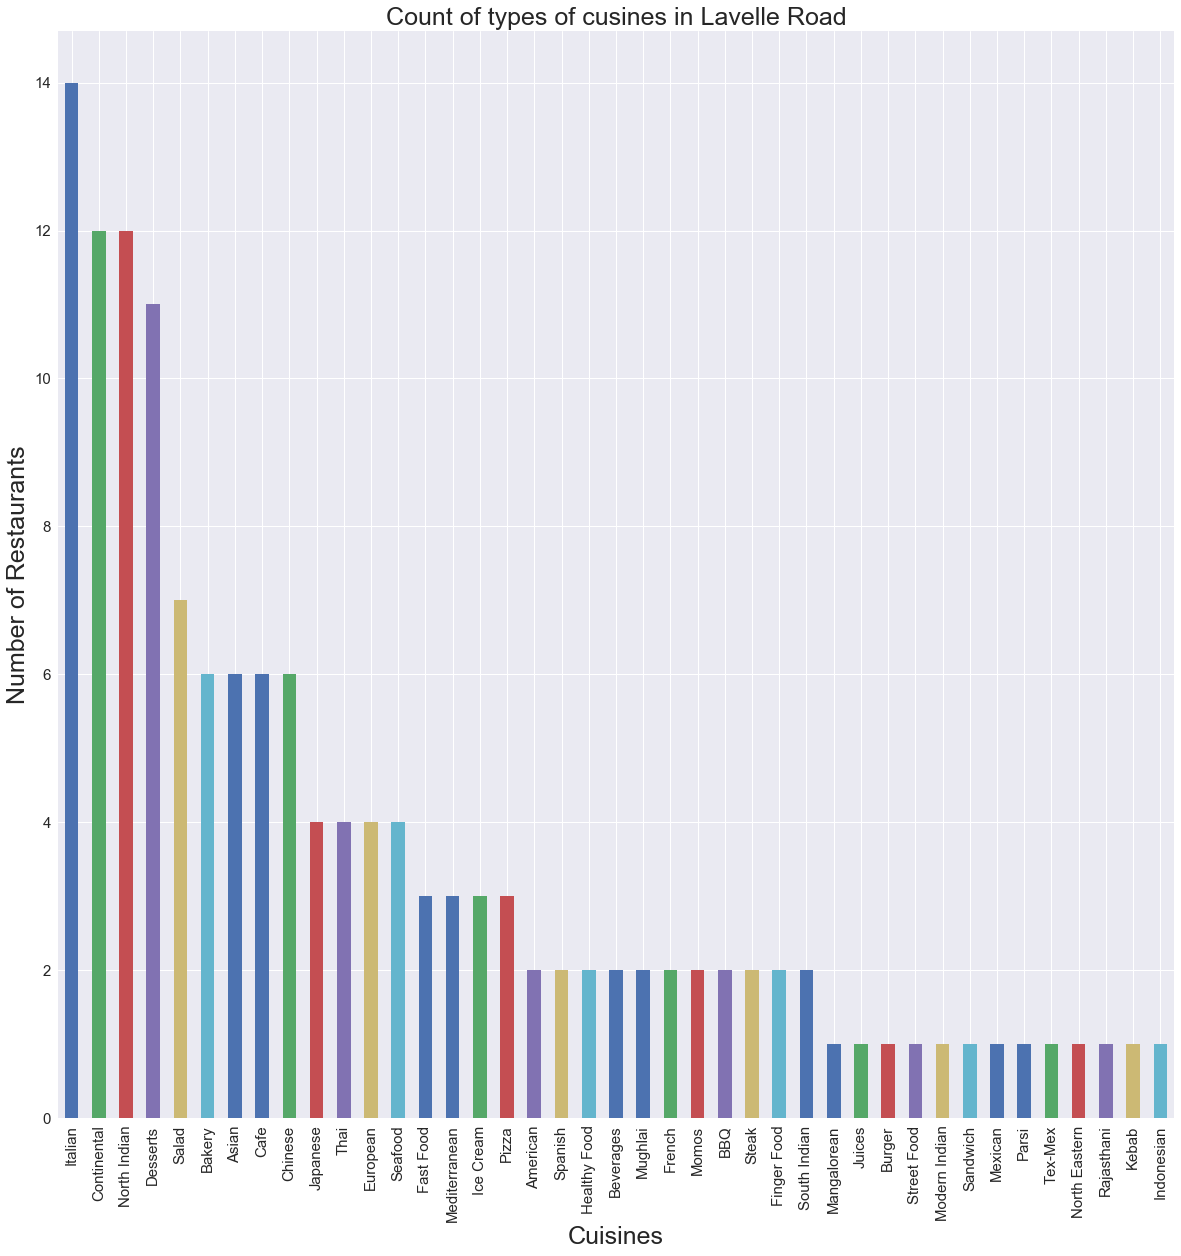

Number of Restaurants with respect to the type of Restaurants : 

Casual Dining     21
Bar               10
Fine Dining        7
Bakery             6
Quick Bites        6
Cafe               6
Dessert Parlor     5
Lounge             4
Microbrewery       4
Beverage Shop      2
Pub                2
Confectionery      1
Irani Cafee        1
Kiosk              1
Delivery           1
Name: rest_type, dtype: int64


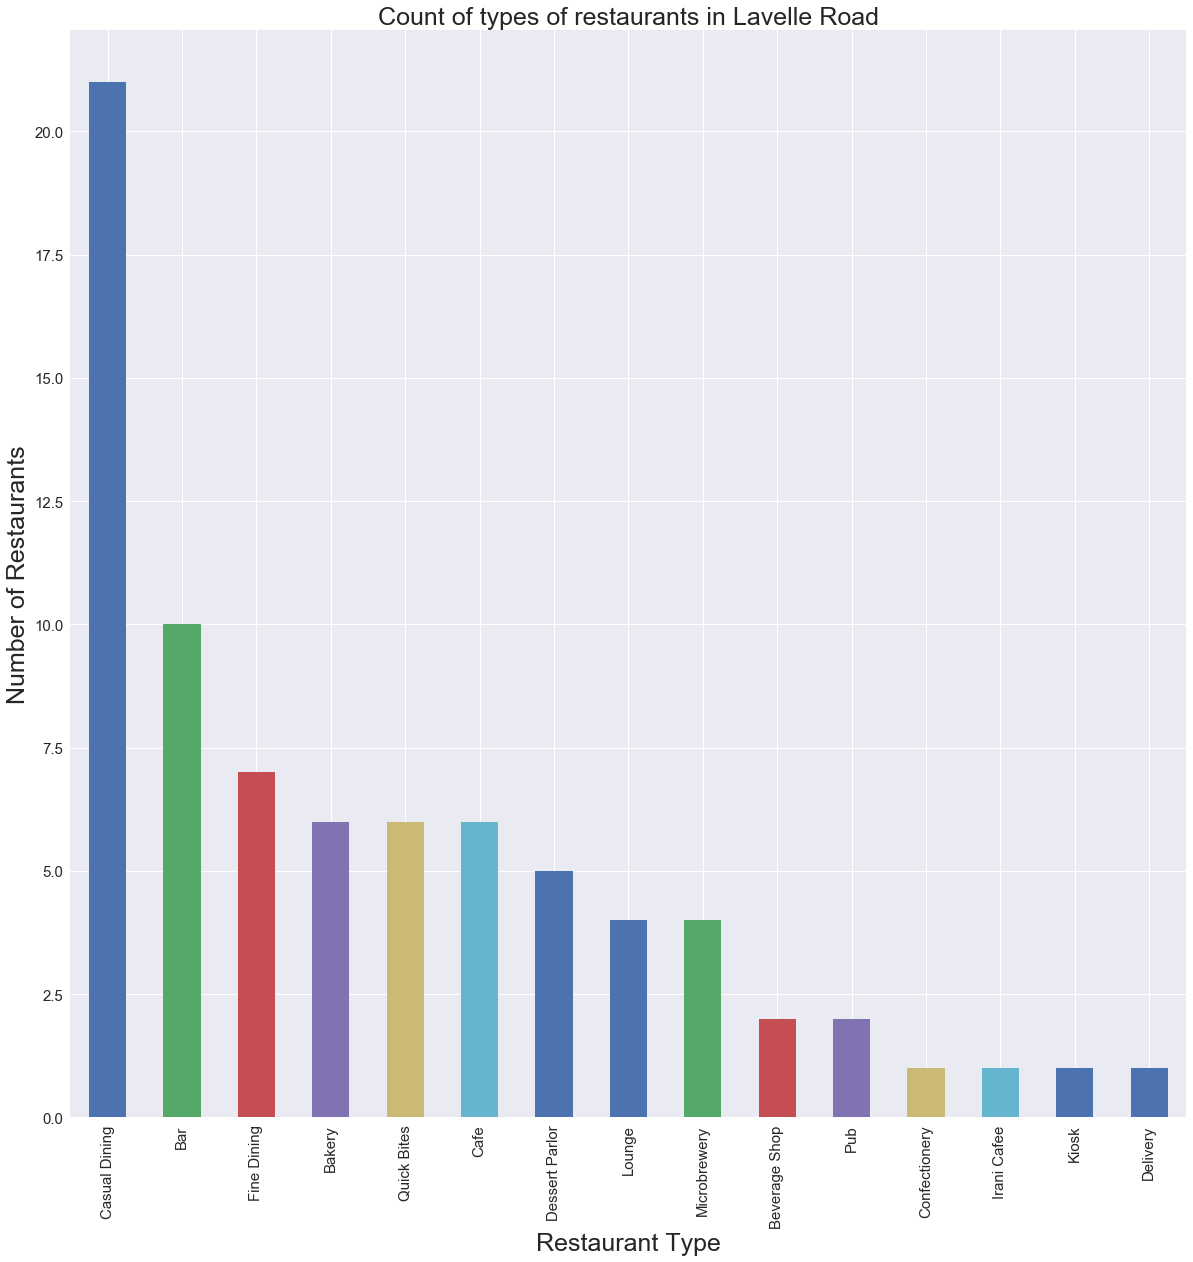

In [115]:
# display the location with highest average rating and also plot some of the characteristics 
# of neighbourhood such as rest_type and cuisines in the form of the bar chart
# https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas

def printNeighborHoodDetails():

    
    print("\n \n ")
    print("Neighborhood Details : \n ")
    print("\t Neighborhood " + neighborhoodDataframe["location"].tolist()[0] + " with highest average rating " + str(neighborhoodDataframe["rate"].mean()))
    print("\n \n ")
    cuisineType = getUniqueValues(dataframe=neighborhoodDataframe,columnName="cuisines")
    print("Number of Restaurants with respect to the type of Cusines : \n")
    print(cuisineType["cuisines"].value_counts())
    print("\n \n ")
    plotBarChart(dataframe=cuisineType,column='cuisines',title='Count of types of cusines in Lavelle Road',xVar='Cuisines',yVar='Number of Restaurants')
    restType = getUniqueValues(dataframe=neighborhoodDataframe,columnName="rest_type")
    print("Number of Restaurants with respect to the type of Restaurants : \n")
    print(restType["rest_type"].value_counts())
    plotBarChart(dataframe=restType,column='rest_type',title='Count of types of restaurants in Lavelle Road',xVar='Restaurant Type',yVar='Number of Restaurants')
    
printNeighborHoodDetails()   

In [228]:
neighborhoodDataframe.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
48783,https://www.zomato.com/bangalore/soda-bottle-o...,"25/4, Opposite Harley Davidson Showroom, Lavel...",Soda Bottle Opener Wala,Yes,Yes,4.4,3730,080 45128763,Lavelle Road,"Casual Dining, Irani Cafee","Okra, Pancakes, Cocktails, Berry Pulao, Kanda ...","Parsi, North Indian","1,300","[('Rated 5.0', 'RATED\n Adore the food and th...",[],Drinks & nightlife,Residency Road
48785,https://www.zomato.com/bangalore/the-biere-clu...,"20/2, Vittal Mallya Road, Lavelle Road, Bangalore",The Biere Club,Yes,Yes,4.3,3498,+91 9986769776\n080 42134668,Lavelle Road,"Pub, Microbrewery","Wheat Beer, Pizza, Cocktails, Virgin Sangria, ...","Continental, BBQ, Finger Food","1,700","[('Rated 5.0', 'RATED\n Went this afternoon a...",[],Drinks & nightlife,Residency Road
48773,https://www.zomato.com/bangalore/skyye-lavelle...,"Uber Level, 16th Floor, UB City, Vittal Mallya...",Skyye,No,Yes,4.2,3140,080 49090000\n+91 7760888899,Lavelle Road,Lounge,"Cocktails, Long Island Iced Tea, Mojito, Peri ...",Continental,"2,500","[('Rated 5.0', ""RATED\n I went there on the o...",[],Drinks & nightlife,Residency Road
47413,https://www.zomato.com/SmokeHouseDeli-LavelleR...,"52/ 53, Ground Floor, Lavelle Road, Bangalore",Smoke House Deli,Yes,No,4.6,2521,+91 8041277989\n+91 8041276272,Lavelle Road,Casual Dining,"Cocktails, Burgers, Salads, Veg Burger, Peri C...","European, Italian, Desserts, Salad, Juices, Steak","1,600","[('Rated 5.0', 'RATED\n Krishna has been the ...",[],Delivery,Residency Road
48779,https://www.zomato.com/bangalore/farzi-cafe-la...,"202, Level 2, UB City, Vittal Mallya Road, Lav...",Farzi Cafe,No,No,4.4,2435,+91 7259400900\n+91 7259600900,Lavelle Road,"Casual Dining, Microbrewery","Appletini, Wheat Beer, Lamb Tacos, Cocktails, ...",Modern Indian,"1,500","[('Rated 4.0', 'RATED\n Amazing food and ambi...",[],Drinks & nightlife,Residency Road


### Final Cleaning

In [116]:
# final cleaning is performed two replace inapproriate ratings such as NAN, 0,null with average rating of all the restaurant. All the null values are removed from the location, cuisines, rest_type.
# All the columns which are not required to build the model is dropped
# https://cmdlinetips.com/2018/04/how-to-drop-one-or-more-columns-in-pandas-dataframe/
def finalCleaning(removedDuplicatesDf):

    finalCleanDf = removedDuplicatesDf[['location', 'rate', 'cuisines','approx_cost(for two people)','rest_type']]
    finalCleanDf['approx_cost(for two people)'].replace(np.nan, '0',inplace=True, regex=True)
    finalCleanDf['approx_cost(for two people)'].replace({',':''},inplace=True, regex=True)
    finalCleanDf = finalCleanDf.apply(pd.to_numeric, errors='coerce').fillna(finalCleanDf)
    finalCleanDf['approx_cost(for two people)'].fillna((finalCleanDf['approx_cost(for two people)'].mean()), inplace=True)
    finalCleanDf['rate'].replace(np.nan, '0',inplace=True, regex=True)
    finalCleanDf['rate'].replace({',':''},inplace=True, regex=True)
    finalCleanDf = finalCleanDf.apply(pd.to_numeric, errors='coerce').fillna(finalCleanDf)
    finalCleanDf = finalCleanDf.dropna(axis=0, subset=['location'])
    finalCleanDf = finalCleanDf.dropna(axis=0, subset=['cuisines'])
    finalCleanDf = finalCleanDf.dropna(axis=0, subset=['rest_type'])
    return finalCleanDf

finalCleanDf = finalCleaning(removedDuplicatesDf)

In [117]:
# Dataframe is split using the semicolon for the attributes of rest_type and cuisines
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html
finalCleanDf['rest_type']=finalCleanDf['rest_type'].str.split(", ")
finalCleanDf['cuisines']=finalCleanDf['cuisines'].str.split(", ")

In [223]:
finalCleanDf.head()

,location,rate,cuisines,approx_cost(for two people),rest_type
49170,Sarjapur Road,4.9,"[Continental, North Indian, Italian, South Ind...",1600,[Microbrewery]
18643,Indiranagar,4.7,"[Italian, American, Pizza]",1500,[Microbrewery]
36668,Koramangala 5th Block,4.7,"[Cafe, American, Burger, Steak]",900,"[Cafe, Casual Dining]"
41525,Marathahalli,4.8,"[European, Mediterranean, North Indian, BBQ]",1600,[Casual Dining]
37606,Koramangala 5th Block,4.7,"[North Indian, European, Mediterranean]",1400,"[Casual Dining, Bar]"


In [118]:
# This function performs one hot encoding using the get dummies of the pandas dataframe
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
def oneHotEncoder(dataframe,columnName):
    
    encodedDataframe = pd.concat([dataframe, pd.get_dummies(dataframe[columnName],prefix=columnName,prefix_sep='_')], axis=1)
    encodedDataframe.drop(columnName,axis=1,inplace=True)
    return encodedDataframe
           
encodedDataframe = oneHotEncoder(dataframe=finalCleanDf,columnName="location")

In [224]:
encodedDataframe.head()

,rate,cuisines,approx_cost(for two people),rest_type,location_BTM,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Basaveshwara Nagar,...,location_Ulsoor,location_Uttarahalli,"location_Varthur Main Road, Whitefield",location_Vasanth Nagar,location_Vijay Nagar,location_West Bangalore,location_Whitefield,location_Wilson Garden,location_Yelahanka,location_Yeshwantpur
49170,4.9,"[Continental, North Indian, Italian, South Ind...",1600,[Microbrewery],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18643,4.7,"[Italian, American, Pizza]",1500,[Microbrewery],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36668,4.7,"[Cafe, American, Burger, Steak]",900,"[Cafe, Casual Dining]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41525,4.8,"[European, Mediterranean, North Indian, BBQ]",1600,[Casual Dining],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37606,4.7,"[North Indian, European, Mediterranean]",1400,"[Casual Dining, Bar]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
# Multiple binarizer is performed for the rest_type and the cuisines
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html
binarizer = MultiLabelBinarizer()

def multilabelBinarizer(encodedDataframe,binarizer):
    
    encodedRestType=pd.DataFrame(binarizer.fit_transform(encodedDataframe['rest_type']),columns=binarizer.classes_, index=encodedDataframe.index)
    encodedCuisines=pd.DataFrame(binarizer.fit_transform(encodedDataframe['cuisines']),columns=binarizer.classes_, index=encodedDataframe.index)
    finalEncodedDataframe = pd.concat([encodedDataframe, encodedRestType, encodedCuisines], axis=1)
    return finalEncodedDataframe
    
finalEncodedDataframe = multilabelBinarizer(encodedDataframe,binarizer)

In [120]:
finalEncodedDataframe.drop("rest_type",axis=1,inplace=True)
finalEncodedDataframe.drop("cuisines",axis=1,inplace=True)

In [222]:
finalEncodedDataframe.head()

,rate,approx_cost(for two people),location_BTM,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Basaveshwara Nagar,location_Bellandur,location_Bommanahalli,...,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vegan,Vietnamese,Wraps
49170,4.9,1600,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18643,4.7,1500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36668,4.7,900,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41525,4.8,1600,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37606,4.7,1400,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Q-3 (a)**
We are solving the problem of **Supervised Learning**.

Supervised learning is the Data mining task of inferring a function from labelled training data. If a specific target is provided, then the problem can be phrased as a supervised one. Target value should exist in the principles as well as data.In this problem, our target variable is defined, which is approx_cost (two people) and in the present in the data. 
Supervised learning analyzes the training data and provides an inferred function, which is used for mapping new examples.

Also, this problem can be solved using **Regression technique**, which is used in Supervised Learning. Regression or value estimation attempts to estimate or predict the numeric value for each individual. Regression involves numeric target value, which is approx_cost(for two people) in our case.


## **Q-3 (b)**

1. **Decision tree** :- Tree-based learning algorithms are considered to be one of the best and mostly used supervised learning methods. A decision tree is an algorithm which uses conditional and controls statement that uses a tree-like graph or model for decisions and their possible consequences. Unlike linear model decision tree can easily map the non-linear relationship. Decision Tree can handle numerical as well as categorical variables. It can also handle multi-output problems. It requires less data cleaning compared to other modelling  techniques. We have used decision tree with max_depth=8 and random_state=0.


2. **Random Forest**:- Random forests is an ensemble classifier that consists of many decision trees and gives the output of the class which is the most voted by individual trees. It is one of the most accurate learning algorithms available. For many data sets, it produces a highly accurate results. It is fully parallelized and fast to predict algorithm.We have used Random Forest with the parameter of n_estimator=100 and max_depth=8. Random forests overcome several problems of decision trees, such as:

    1. Random Forest produce the result by averaging the trees, so there is always a reduction in the overfitting.

    2. Variance is reduced in random forest as compared to the decision tree.
    

3. **Xgboost** :- It stands for eXtreme Gradient Boosting. In the bagging technique, trees are built in the parallel while in the boosting technique trees are buile in the sequencial order and each tree tries to reduce the error generated by the previously built tree. In Xgboost we train each subset in the form of residual meaning difference between the true value and predicted values. XGBoost is very fast as it utilizes the power of parallel processing uses multiple CPU to execute the model. XGBoost has in-built L1 norm and L2 norm which prevents the model from overfitting. XGBoost has a good capability of handling missing values.XGBoost allows to run a cross-validation at every iteration of the boosting process and thus provides exact optimum number of boosting iterations in a single run.We have used XGBoost with n_estimator =100.

## **Q-3 ( c )**

**Mean Square Error :-** Mean Square Error is the average of the square of the errors. The larger the number is we can say that the error is large. The lower value of MSE indicates that the model is performing the better and 0 means the model is perfect Error means the difference between the observed values(y1,y2,…) and predicted values(p(y1), p(y2),….). This error always gives a positive result because we square the difference between the observed values and predictive values.

MSE= 1/n ∑ (y – y^ )2

n = total number of data points

(y – y^ ) =  difference between the actual value and predictive value

**R2 Score**:- R2 score varies between 0 to 100 percent. If R2 score is 100 percent, we can say that there is no variance and variables are perfectly co-related with each other. A lower value of R2 indicates that  there is a low level of correlation. In our case, the highest value for the R2 score is for  Xgboost model, and that is around 75%.

**Mean Absolute Error :-** In Mean Absolute Error, we calculate residual at every data point and consider the absolute value so that positive and negative values do not cancel out each other. We can say that mean absolute error describes the magnitude of the Residual. Mean Absolute  Error is less sensitive to the outliers.

MSE= 1/n ∑ |y – y^ |

n = total number of data points

|y – y^ | = absolute value of the difference between actual output and predictive output.



## **Q-3 ( d )**

Overfitting is the tendency of data mining procedures to tailor models to the training data, at the expense of generalization to unseen data. In short, we can say that model which provides higher accuracy in the training dataset, but less accuracy on the testing dataset is considered as an over-fitting model. As we have used the decision tree to build our model, the best technique to avoid overfitting the decision tree is pruning.

In **pruning**, we remove the branches of the tree.We remove the decision nodes starting from the leaf node in such a manner that overall accuracy is not disturbed.This can be done by dividing the training data in the training and validation set.In our decision tree model, we have chosen max_depth = 8 so that model won’t overfit.

To avoid the over-fitting, we can also use the **ensemble classifier** such as Random forest which is a Bagging technique and uses multiple decision trees and provides the output which is the most voted.

We can also use **cross-validation** techniques by splitting a labelled dataset into k partitions called folds (k=5 or 10). Cross-validation then iterates training and testing k times in a particular way. In every iteration of cross-validation, a different fold is chosen as the testing data.

hyperparameter tuning like **grid search** is also a good technique which tunes our model by identifying ideal parameter and avoid overfitting.

In [124]:
# Divide the dataset in the form of the taining and testing
# https://scikit-learn.org/0.16/modules/generated/sklearn.cross_validation.train_test_split.html
data = np.array(finalEncodedDataframe.drop(['approx_cost(for two people)'], 1))
target = np.array(finalEncodedDataframe['approx_cost(for two people)']) 

X_train, X_test, y_train, y_test = cross_validation.train_test_split(data, target, test_size=0.3)

In [134]:
# This function takes the input as a regressor and regressorName and gives the training and testing accuracy for the each mode.
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
# https://xgboost.readthedocs.io/en/latest/python/python_api.html
# https://www.datacamp.com/community/tutorials/xgboost-in-python
# https://scikit-learn.org/stable/tutorial/basic/tutorial.html
# https://scikit-learn.org/stable/modules/model_evaluation.html
# https://medium.com/@contactsunny/how-to-split-your-dataset-to-train-and-test-datasets-using-scikit-learn-e7cf6eb5e0d

def regressDatasets(regressor,regressorName):
    
    regressorTrainset = regressor.fit(X_train, y_train)
    accTrain = regressorTrainset.score(X_train, y_train) * 100
    print('\t \t Accuracy of '+ regressorName +' on training set: ' + str(accTrain))
    y_train_pred = regressorTrainset.predict(X_train)
        
    accTest = regressorTrainset.score(X_test, y_test) * 100
    print('\t \t Accuracy of '+ regressorName +' on test set: ' + str(accTest),'\n')
    y_test_pred = regressorTrainset.predict(X_test)
    
    return accTrain,accTest,y_train_pred,y_test_pred


print('Decision Tree Regressor : \n')
decisionTreeReg = DecisionTreeRegressor(max_depth =8,random_state=0)
accTrainDec ,accTestDec,y_train_pred_dec,y_test_pred_dec = regressDatasets(regressor=decisionTreeReg,regressorName="Decision Tree Regressor")

print('Random Forest Regressor : \n')
randomForestReg = RandomForestRegressor(n_estimators = 100, random_state = 0,max_depth=8)
accTrainRF ,accTestRF,y_train_pred_rf,y_test_pred_rf = regressDatasets(regressor=randomForestReg,regressorName="Random Forest Regressor")

print('XGBoost Regressor : \n')
xgBoostReg = xgb.XGBRegressor(n_estimators = 100,random_state = 0)
accTrainXgb ,accTestXgb,y_train_pred_xgb,y_test_pred_xgb = regressDatasets(regressor=xgBoostReg,regressorName="Xg Boost Regressor")

Decision Tree Regressor : 

	 	 Accuracy of Decision Tree Regressor on training set: 78.8501662083992
	 	 Accuracy of Decision Tree Regressor on test set: 69.5450835036104 

Random Forest Regressor : 

	 	 Accuracy of Random Forest Regressor on training set: 79.91752122665629
	 	 Accuracy of Random Forest Regressor on test set: 73.46325718604221 

XGBoost Regressor : 

[01:39:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 	 Accuracy of Xg Boost Regressor on training set: 78.24782255553434
	 	 Accuracy of Xg Boost Regressor on test set: 75.49073091049232 



### Comparison of Score for training and Testing for different Regressor

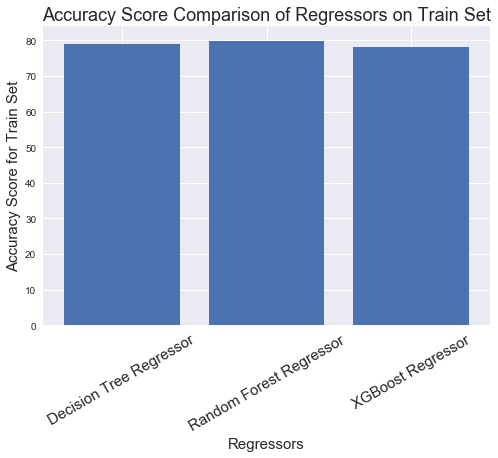

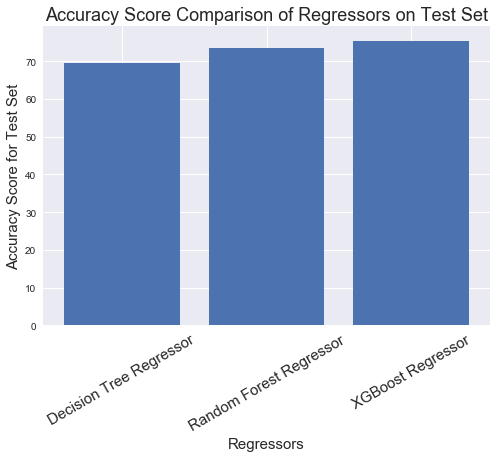

In [139]:
# Comparison of the testing and training accuracy of different regerssor in the form of bar chart format.
def compareAccuraciesOfRegressors(regressors,accuracies, setType):
    
    index = np.arange(len(regressors))
    plot.bar(index, accuracies)
    plot.xlabel('Regressors', fontsize=15)
    plot.ylabel('Accuracy Score for '+ setType +' Set', fontsize=15)
    plot.xticks(index, regressors, fontsize=15, rotation=30)
    plot.title('Accuracy Score Comparison of Regressors on '+setType+' Set',fontsize=18)
    plot.show()
    print("\n \n")
    
    
listOfTrainAccuracies = [accTrainDec,accTrainRF,accTrainXgb]
listOfRegressors = ["Decision Tree Regressor","Random Forest Regressor","XGBoost Regressor"]
listOfTestAccuracies = [accTestDec,accTestRF,accTestXgb]
compareAccuraciesOfRegressors(regressors=listOfRegressors,accuracies=listOfTrainAccuracies,setType="Train") 
compareAccuraciesOfRegressors(regressors=listOfRegressors,accuracies=listOfTestAccuracies,setType="Test") 

## **Q-3 ( e )**

We have built three different models using a decision tree, Random Forest and Xgbbost. To evaluate these models, we have used Mean Square Error (MSE), Mean Absolute Error (MAE) and R2 Score.
From the below result we can say that MAE and MSE are the highest for the decision tree and lowest for the Xgboost.MAE and MSE for the Random forest are greater than the decision tree but less than Xgboost. As MSE and MAE value is high, the model is less perfect. So, we can conclude that Xgboost is a better model as compared to the decision tree and the random forest because it contains the less value of MAE and MSE as compared to the other two models. Moreover, the R2 score for the xgboost is approximately 75%, meaning there is less variance and variables are perfectly correlated with each other compared to the other two models.


**Cross-Validation** is used to evaluate the predictive performance of the models and to decide how they perform with an unseen data set, which is also known as the test data set.The motivation behind the cross-validation is when we build the model, it is based on the training data set. So, we do not have any idea regarding whether our model is robust or not when it works with unknown data.


There two types of cross-validation we can perform: leave one out and k fold.We have used k fold cross validation as leave one out requires higher computational demand.In k fold validation, we have used the **value of k as a 10** and find the value of the mean of accuracy and standard deviation for every model. The lowest standard deviation is observed in the Xgboost, and the highest standard deviation is observed in the decision tree. The mean of accuracy for the cross-validation is the highest for xgboost model(~73).So, we can conculde that XGBoost provides the best performance in K fold cross validation.


### Error Calculation

In [126]:
# Function calculates MSE, MAE and R2_score for the decision tree, random forest and XGBoost.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

def regressError(regressorName):
    
    if(regressorName == 'Decision Tree'):
        y_pred= y_test_pred_dec
    elif(regressorName == 'Random Forest'):
        y_pred= y_test_pred_rf
    else:
        y_pred= y_test_pred_xgb
    accMeanSquare = mean_squared_error(y_test,y_pred)
    accAbsolute = mean_absolute_error(y_test, y_pred)
    accR2Score = r2_score(y_test, y_pred)
    print('\t \t Mean Square Error for '+ regressorName +' is: ' + str(accMeanSquare))
    print('\t \t Absolute Error for '+ regressorName +' is: ' + str(accAbsolute))
    print('\t \t R2 score for '+ regressorName +' is: ' + str(accR2Score))

print(' Decision Tree Error Calculation : \n')
regressError(regressorName = 'Decision Tree')
print(' Random Forest Error Calculation : \n')
regressError(regressorName = 'Random Forest')
print(' Xg boost Error Calculation : \n')
regressError(regressorName = 'Xg Boost')


 Decision Tree Error Calculation : 

	 	 Mean Square Error for Decision Tree is: 47119.72763935239
	 	 Absolute Error for Decision Tree is: 141.2184254466869
	 	 R2 score for Decision Tree is: 0.6954508350361039
 Random Forest Error Calculation : 

	 	 Mean Square Error for Random Forest is: 41057.54464890641
	 	 Absolute Error for Random Forest is: 137.03574541416694
	 	 R2 score for Random Forest is: 0.7346325718604221
 Xg boost Error Calculation : 

	 	 Mean Square Error for Xg Boost is: 37920.64523552735
	 	 Absolute Error for Xg Boost is: 129.19281743619985
	 	 R2 score for Xg Boost is: 0.7549073091049232


### K Fold Cross-Validation

In [127]:
# Calculation of mean accuracy and Standard deviation for the different regressor for K fold cross validations(k=10).
# https://scikit-learn.org/stable/modules/cross_validation.html
def kfoldStatsOfRegressor(regressor,regressorName,folds):
    
    kFoldAccuracy = cross_val_score(estimator=regressor,X=X_train,y=y_train,cv=folds,n_jobs=-1)
    print('\t \t Mean of KFold Accuracies for '+ regressorName +' is: ' + str(kFoldAccuracy.mean()))
    print('\t \t Standard Deviation for '+ regressorName +' is: ' + str(kFoldAccuracy.std()))
    print('\n \n')
    
    
kfoldStatsOfRegressor(regressor=decisionTreeReg,regressorName = "Decision Tree Regressor",folds=10)
kfoldStatsOfRegressor(regressor=randomForestReg,regressorName = "Random Foest Regressor",folds=10)
kfoldStatsOfRegressor(regressor=xgBoostReg,regressorName = "XGBoost Regressor",folds=10)

	 	 Mean of KFold Accuracies for Decision Tree Regressor is: 0.658586518949488
	 	 Standard Deviation for Decision Tree Regressor is: 0.05056289848986607

 

	 	 Mean of KFold Accuracies for Random Foest Regressor is: 0.7116256275282692
	 	 Standard Deviation for Random Foest Regressor is: 0.029743898129867496

 

	 	 Mean of KFold Accuracies for XGBoost Regressor is: 0.7299326955961911
	 	 Standard Deviation for XGBoost Regressor is: 0.0306240232141015

 



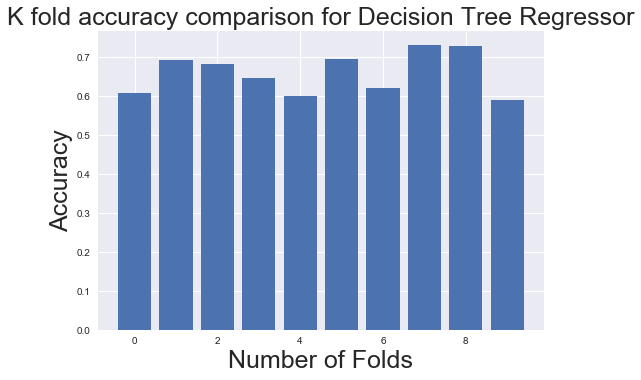

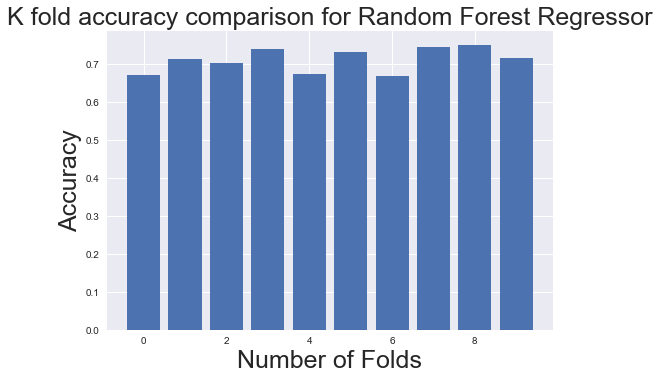

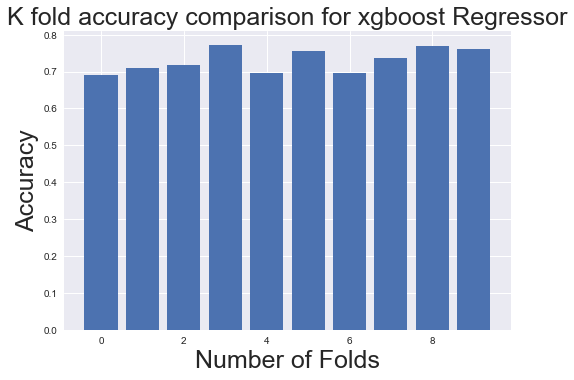

In [171]:
# Plot of Comparison of K fold ccuracy for the different classifier.
def compareKFoldAccuracies(regressor,title,folds):
    
    kFoldAccuracy = cross_val_score(estimator=regressor,X=X_train,y=y_train,cv=folds,n_jobs=-1)
    kfolds = list()
    
    for i in range(folds):
        kfolds.append(i)
    
    plot.bar(kfolds,kFoldAccuracy)
    plot.title(title,fontsize=25)
    plot.xlabel("Number of Folds",fontsize=25)
    plot.ylabel("Accuracy",fontsize=25)
    plot.show()
    
compareKFoldAccuracies(regressor=decisionTreeReg,title="K fold accuracy comparison for Decision Tree Regressor",folds=10)
compareKFoldAccuracies(regressor=randomForestReg,title="K fold accuracy comparison for Random Forest Regressor",folds=10)
compareKFoldAccuracies(regressor=xgBoostReg,title="K fold accuracy comparison for xgboost Regressor",folds=10)

### Learning Curve

## **Q-3 ( f )**

Learning curve is defined as a plot which is used for generalization performance against training data.
We have plotted learning curve for decision tree, random forest and XgBoost.

When the training set size is 1, we can see that the error for the training set is 0 since the model has no problem fitting perfectly a single data point. But when tested on the test set, the error goes up to 233.5,236, and 240  for Decision Tree Regressor, Random Forest Regressor and XGBoost Regressor repectively. This behaviour is due to the same data point which makes the prediction perfect.

When the training set size increases to 120, the training error increases sharply, while the test error decreases in the same rate in all the three model.
from the 450 datapoints onwards test set error stays the same in all three models.

If the training error is very low which means model fits the training data very well and it has low bias.
If the training error is high, which model fails to fit the training data well and it has high bias . More narrow the gap means less variance and high bias which is good

High variance means the model fits training data too well nd fails in generalizing on data that has not seen in training.
When training data is fitted too well, the model will have trouble generalizing on data that hasn’t seen in training. 

Difference between training and test errors shows that gap between the two learning curves
Higher the gap, higher the vaariance. But here, we have narrow gap which suggests the low variance problem
gap = test error - training error

The two curves have already converged when the gap is too low.

Overfitting is more in decision tree than in Random Forest and Xgboost.
Variance is decreasing in the below order : 
decision tree > random forest > xgboost

Adding more instances does not do any good so Feature Selection and Hyperparamter tuning are done to solve variance and bias problems.

We need to stop when the error is irreducible which is not some ideal error and at that time both the curves converge to some irreducible error.

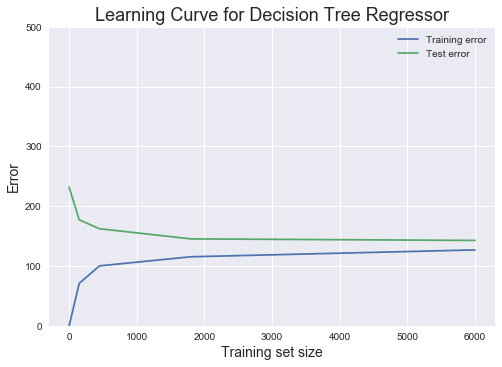

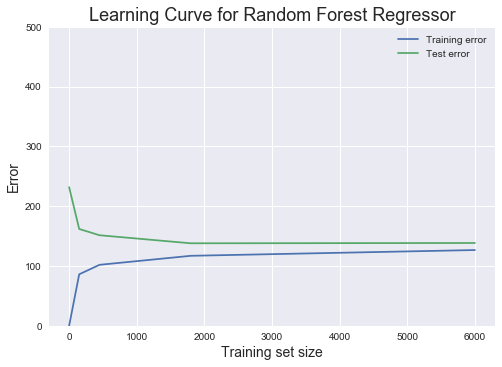

[19:43:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:32] WARNI

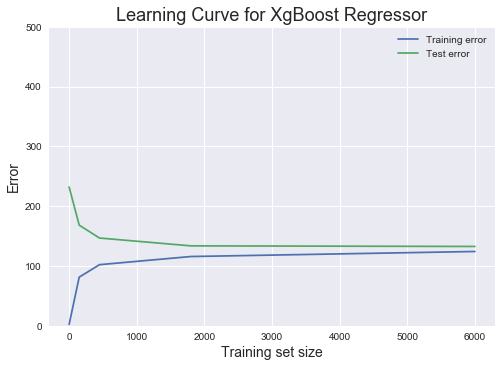

In [220]:
# https://chrisalbon.com/machine_learning/model_evaluation/plot_the_validation_curve/
# https://www.dataquest.io/blog/learning-curves-machine-learning/
train_instances = [1, 150, 450, 1800, 6000]

def learningCurvePlotting(train_sizes,regressor,folds,title):

    train_sizes, train_scores, test_scores = learning_curve(estimator = regressor,X = X_train,y = y_train, train_sizes = train_sizes, cv = folds,scoring = 'neg_mean_absolute_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    test_scores_mean = -test_scores.mean(axis = 1)
    plot.style.use('seaborn')
    plot.plot(train_sizes, train_scores_mean, label = 'Training error')
    plot.plot(train_sizes, test_scores_mean, label = 'Test error')
    plot.ylabel('Error', fontsize = 14)
    plot.xlabel('Training set size', fontsize = 14)
    plot.title(title, fontsize = 18)
    plot.legend()
    plot.ylim(0,500)
    plot.show()
        
learningCurvePlotting(train_sizes=train_instances,regressor=decisionTreeReg,folds=5,title="Learning Curve for Decision Tree Regressor")
learningCurvePlotting(train_sizes=train_instances,regressor=randomForestReg,folds=5,title="Learning Curve for Random Forest Regressor")
learningCurvePlotting(train_sizes=train_instances,regressor=xgBoostReg,folds=5,title="Learning Curve for XgBoost Regressor")

## **Q-3 ( g )**

There are two types of parameters which are commonly used in the field of machine learning and data Science,. The first type of parameters which are learned from the model and the second type of parameters which can be passed to the model for the tuning and also known as hyperparameters.

While building our model using random forest or Xgboost, we used different parameters such as n_estimator and maximum depth. Generally, we randomly select the values of these parameters and check what our model returns as a result. But, many times, selecting parameters for the algorithm randomly can make our model exhaustive.

So rather than randomly giving the parameters to the model and checking the result every time, the best practice is to build an algorithm which gives the parameters and its value in which our model works the best. This algorithm is called a grid search.

**Parametparameters used for tunning in decisiontree:-** {'max_depth': range(1,20,1),'min_impurity_decrease':range(1,100,5)}

1. **max_depth**:- The maximum depth of the tree.Increasing its value will make the model overfit

2. **min_impurity_decrease :-** A node will be split only if this split produces a decrease of the impurity greater than  equal  mentioned value.

**Parametparameters used for tunning in random forest:-** parameters={'max_depth': range(1,20,1),'n_estimators':[100,125,150]}

1. **n_estimators :-** Number of trees in the forest.

**Parametparameters used for tunning in XGBoost:-** parameters={'colsample_bytree':[0.1,0.2,0.3], 'max_depth':[3,4,5],'subsample':[0.3,0.4,0.5],'n_estimator':[100,120]}

1. **colsample_bytree** :- It is a subsample ratio of the column while constructing a tree.

2. **Max_depth**:- It indicates the maximum depth of the tree. Increasing its value will make the model overfit.

3. **n_estimator**:- number of trees to be used in the forest.

4. **Subsample:-** It occurs once in every boosting iteration. It is the ratio of the training instances. If we take its value as 0.5, then Xgboost will randomly sample the 50% of training data before growing the trees to prevent overfitting.

After Running the GridSearch, we have received the tunned parameters for all the regressor. If we give this tuned parameter into
our model then the performance will increase.

Also, during the grid search we have calculated the best score for every regressor which is greater than K fold accuracy of the every regressor. So, we can say that overall performance of the model has been improved.

In [130]:
# https://discuss.analyticsvidhya.com/t/extracting-the-best-fitted-decisiontreeclassifier-after-grid-search/10029
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# https://stackoverflow.com/questions/53970738/i-am-using-gridsearchcv-and-fit-error-get-params-missing-1-required-positiona
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html
def gridSearchDecisionTree():
    parameters_decisiontree={'max_depth': range(1,20,1),'min_impurity_decrease':range(1,100,5)}
    clf_tree=decisionTreeReg
    clf=GridSearchCV(clf_tree,parameters_decisiontree)

    best_score_tree=clf.fit(X_train,y_train).best_score_
    tunedecisiontree = clf.fit(X_train,y_train).best_params_
#print(a)
#print(b)
    print(tunedecisiontree)
    print(best_score_tree)
gridSearchDecisionTree()



{'max_depth': 14, 'min_impurity_decrease': 66}
0.6861655613696419


In [132]:
# GridSearch for Random Forest
def gridSearchRandomforest():
    parameters={'max_depth': range(1,20,1),'n_estimators':[100,125,150]}
    clf_tree=randomForestReg
    clf=GridSearchCV(clf_tree,parameters)
#a=clf.fit(X_train,y_train).best_estimator_
    best_score_randomforest=clf.fit(X_train,y_train).best_score_
    tunerandomforest=clf.fit(X_train,y_train).best_params_
#print(a)
#print(b)
    print(tunerandomforest)
    print(best_score_randomforest)
gridSearchRandomforest()

{'max_depth': 18, 'n_estimators': 150}
0.735523236783738


In [133]:
# Grid Search for XgBoost
def gridSearchXgboost():
    parameters={'colsample_bytree':[0.1,0.2,0.3], 'max_depth':[3,4,5],'subsample':[0.3,0.4,0.5],'n_estimator':[100,120]}
    clf_tree=xgBoostReg
    clf=GridSearchCV(clf_tree,parameters)
    best_score_xgboost=clf.fit(X_train,y_train).best_score_
    tunexgboost=clf.fit(X_train,y_train).best_params_

    print(tunexgboost)
    print(best_score_xgboost)
gridSearchXgboost()

[00:45:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:45:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:45:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:45:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:45:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:45:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:45:55] WARNI

[00:49:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:49:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:49:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:49:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:49:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:49:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:02] WARNI

[00:53:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:54:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:54:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:54:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:54:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:54:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:54:34] WARNI

[00:58:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:59:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:59:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:59:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:59:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:59:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:59:41] WARNI

[01:03:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:03:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:03:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:03:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:03:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:03:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:03:54] WARNI

[01:07:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:07:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:07:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:07:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:08:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:08:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:08:14] WARNI

[01:12:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:12:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:12:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:12:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:12:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:13:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:13:08] WARNI

###  Score After Tuning Parameters

In [185]:
def resultsAfterTuning():
    
    print('Decision Tree Regressor After Tuning : \n')
    decisionTreeRegTun = DecisionTreeRegressor(max_depth = 14, min_impurity_decrease = 66,random_state=0)
    accTrainDecTune ,accTestDecTune,y_train_pred_dec,y_test_pred_dec = regressDatasets(regressor=decisionTreeRegTun,regressorName="Decision Tree Regressor")

    print('Random Forest Regressor After Tuning : \n')
    randomForestRegTun = RandomForestRegressor(max_depth = 18, n_estimators = 150,random_state = 0)
    accTrainRFTune ,accTestRFTune,y_train_pred_rf,y_test_pred_rf = regressDatasets(regressor=randomForestRegTun,regressorName="Random Forest Regressor")

    print('XGBoost Regressor After Tuning : \n')
    xgBoostRegTun = xgb.XGBRegressor(colsample_bytree = 0.3, max_depth = 5, n_estimator = 100, subsample = 0.5,n_estimators = 100,random_state = 0)
    accTrainXgbTune ,accTestXgbTune,y_train_pred_xgb,y_test_pred_xgb = regressDatasets(regressor=xgBoostRegTun,regressorName="Xg Boost Regressor")
    
    
    return decisionTreeRegTun,randomForestRegTun,xgBoostRegTun,accTestDecTune, accTestRFTune, accTestXgbTune
    
    
decisionTreeRegTun,randomForestRegTun,xgBoostRegTun,accTestDecTune, accTestRFTune, accTestXgbTune = resultsAfterTuning()    

Decision Tree Regressor After Tuning : 

	 	 Accuracy of Decision Tree Regressor on training set: 82.39645617863609
	 	 Accuracy of Decision Tree Regressor on test set: 72.087281472769 

Random Forest Regressor After Tuning : 

	 	 Accuracy of Random Forest Regressor on training set: 90.1946788167055
	 	 Accuracy of Random Forest Regressor on test set: 77.31334807222619 

XGBoost Regressor After Tuning : 

[15:46:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 	 Accuracy of Xg Boost Regressor on training set: 81.40528774907867
	 	 Accuracy of Xg Boost Regressor on test set: 76.32026750825646 



### Comparison of Test Accuracy before And After Tuning

    1. Decision Tree
    
        1. Test Accuracy before model tuning:- 69.5450835036104 
        2. Test Accuracy After model tuning:- 72.087281472769 
        
    2. Random Forest
    
        1. Test Accuracy before model tuning:- 73.46325718604221 
        2. Test Accuracy After model tuning:- 77.31334807222619 
        
    3. XGBoost
    
        1. Test Accuracy before model tuning:- 75.49073091049232 
        2. Test Accuracy After model tuning:- 77.31334807222619 

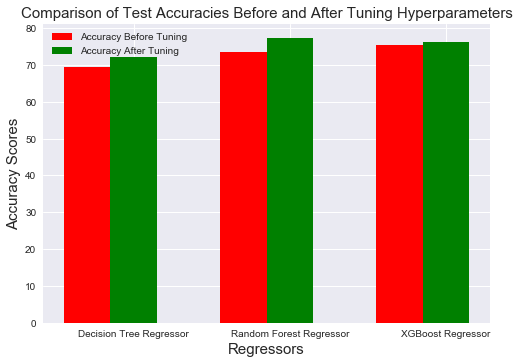

In [163]:
# https://pythonspot.com/matplotlib-bar-chart/

def resultsComprisonAfterTuning(regressors,accuracies,accuraciesTune):

    index = np.arange(len(regressors))
    bar_width = 0.3
    plot.bar(index, accuracies, bar_width,color='red',label='Accuracy Before Tuning')
    plot.bar(index + bar_width, accuraciesTune, bar_width,color='green',label='Accuracy After Tuning')
    plot.xlabel('Regressors',fontsize=15)
    plot.ylabel('Accuracy Scores',fontsize=15)
    plot.title('Comparison of Test Accuracies Before and After Tuning Hyperparameters',fontsize=15)
    plot.xticks(index + bar_width, regressors)
    plot.legend()
    plot.show()
    
listTestAccTune = [accTestDecTune , accTestRFTune ,accTestXgbTune]    
listOfRegressors = ["Decision Tree Regressor","Random Forest Regressor","XGBoost Regressor"]
resultsComprisonAfterTuning(regressors = listOfRegressors,accuracies = listOfTestAccuracies, accuraciesTune = listTestAccTune)    


### Relief Feature

#### Relief based algorithms are used to find most important features from the dataset. 

In [198]:
# https://libraries.io/pypi/ReliefF

def reliefFeatureSelection():
    
    fs = ReliefF(n_neighbors=100, n_features_to_keep=5)
    df6 = fs.fit_transform(X_train, y_train)
    X_test_impFeatures = fs.transform(X_test)
    subset = X_test_impFeatures.tolist()
    impFeatures = pd.DataFrame(subset,columns=["feature1","feature2","feature3","feature4","feature5"])
    return X_test_impFeatures,impFeatures
    
X_test_impFeatures,impFeatures = reliefFeatureSelection()

In [199]:
impFeatures

,feature1,feature2,feature3,feature4,feature5
0,0.0,1,0,0,0
1,3.5,0,0,0,1
2,0.0,0,0,1,0
3,4.1,0,0,0,0
4,4.1,0,0,0,0
5,3.7,0,0,0,0
6,4.1,0,0,0,0
7,0.0,1,1,0,1
8,4.0,1,0,0,0
9,4.0,0,0,0,0


### References:-

"Decision Trees — A simple way to visualize a decision", Medium, 2019. [Online]. Available: https://medium.com/greyatom/decision-trees-a-simple-way-to-visualize-a-decision-dc506a403aeb. [Accessed: 02- Jul- 2019].

"Everything You Need to Know About Decision Trees", Towards Data Science, 2019. [Online]. Available: https://towardsdatascience.com/everything-you-need-to-know-about-decision-trees-8fcd68ecaa71. [Accessed: 02- Jul- 2019].

W. Forest?, J. Constantine and R. Cruz, "Why do we need XGBoost and Random Forest?", Data Science Stack Exchange, 2019. [Online]. Available: https://datascience.stackexchange.com/questions/23789/why-do-we-need-xgboost-and-random-forest. [Accessed: 02- Jul- 2019].

"How exactly XGBoost Works? - Pushkar Mandot - Medium", Medium, 2019. [Online]. Available: https://medium.com/@pushkarmandot/how-exactly-xgboost-works-a320d9b8aeef. [Accessed: 02- Jul- 2019].

N. Kumar, N. Kumar and V. profile, "Advantages of XGBoost Algorithm in Machine Learning", Theprofessionalspoint.blogspot.com, 2019. [Online]. Available: http://theprofessionalspoint.blogspot.com/2019/03/advantages-of-xgboost-algorithm-in.html. [Accessed: 02- Jul- 2019].
    
E. McNulty et al., "What's The Difference Between Supervised and Unsupervised Learning? - Dataconomy", Dataconomy, 2019. [Online]. Available: https://dataconomy.com/2015/01/whats-the-difference-between-supervised-and-unsupervised-learning/. [Accessed: 02- Jul- 2019].

"Mean Squared Error, R2, and Variance in Regression Analysis", BMC Blogs, 2019. [Online]. Available: https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/. [Accessed: 02- Jul- 2019].

 2019 . [Online]. Available: https://www.researchgate.net/post/What_is_the_purpose_of_performing_cross-validation. [Accessed: 02- Jul- 2019].

 2019 . [Online]. Available: https://www.researchgate.net/post/What_is_over_fitting_in_decision_tree. [Accessed: 02- Jul- 2019].

 2019 . [Online]. Available: https://www.quora.com/How-do-I-prevent-avoid-overfitting-on-my-decision-tree-classifier-Sklearn. [Accessed: 02- Jul- 2019].

"Cross Validation and Grid Search for Model Selection in Python", Stack Abuse, 2019. [Online]. Available: https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/. [Accessed: 02- Jul- 2019].

C. Pascual, "Tutorial: Understanding Linear Regression and Regression Error Metrics", Dataquest, 2019. [Online]. Available: https://www.dataquest.io/blog/understanding-regression-error-metrics/. [Accessed: 02- Jul- 2019].

T. Foster Provost, "Data Science for Business", Shop.oreilly.com, 2019. [Online]. Available: http://shop.oreilly.com/product/0636920028918.do. [Accessed: 02- Jul- 2019].

slides of "Data Analytic Thinking", Dr. Amilcar Soares, summer 2019

